# 뉴스 기사 분류: 다중 분류 문제

> 이전 섹션에서 완전 연결된 신경망을 사용해 벡터 입력을 어떻게 두 개의 클래스로 분류하는지 보았다.

> 이번 세션에서는 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만들어 보겠다. 클래스가 많기 때문에 이 문제는 다중 분류의 예이다. 

## 로이터 데이터셋

> 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용한다. 
- 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많다. 
- 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다.

#1. 데이터셋 얻기

In [1]:
from keras.datasets import reuters
import numpy as np
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))

2121728/2110848 [==============================] - 0s 0us/step
8982
2246


In [3]:
print(train_data[0])
print(train_labels[:10])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[ 3  4  3  4  4  4  4  3  3 16]


#2. 데이터 확인

##2.1 리뷰확인

In [ ]:
word_index = reuters.get_word_index()
word_index

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

decoded_newswire = ' '.join([reverse_word_index.get( i-3, '?') for i in train_data[0]])
decoded_newswire

##2.2 labels 확인

In [ ]:
import numpy as np

unique_elements, counts_elements = np.unique(train_labels, return_counts=True)
print('각 레이블에 대한 빈도수 : ')
print(np.asarray( (unique_elements, counts_elements) ))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


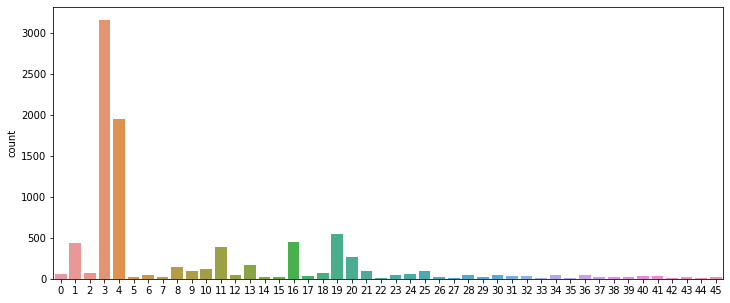

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(train_labels)

#3. 데이터 전처리

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.

  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [12]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

> labels 정보는 46가 존재하여 위의 vetorize_sequences에 dimension=46으로 함수를 이용해도 되지만 케라스에서 지원하는 to_categorical 함수를 이용하여 원 핫 인코딩 처리를 해도 된다.

#4. 모델구성

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
# 최종적으로 46개로 분류해야 하기 때문에 2의 승수 중 46보다 큰 최소값 64를 지정했다.
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

# 여러 개의 데이터를 얻기 위해 softmax를 사용했다.
# softmax는 여러 개의 확률 데이터를 얻게 된다.
model.add(layers.Dense(46, activation='softmax'))

In [17]:
# optimizer는 여러 가지를 사용해 봐야 하며 adam이 가장 많이 사용된다.
# loss함수는 모델의 마지막 Dense가 어떠한 정보냐에 따라 달라진다.
# sigmoid = binary_crossentropy, softmax = categorical_crossentropy
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#5. 훈련 검증

##5.1 데이터 분리

In [13]:
X_train.shape

(8982, 10000)

In [14]:
validate_X_train = X_train[:1000]
partial_X_train = X_train[1000:]

validate_y_train = y_train[:1000]
partial_y_train = y_train[1000:]

##5.2 학습 및 검증

In [ ]:
history = model.fit(partial_X_train, partial_y_train,
                    epochs=20, batch_size=512, 
                    validation_data = (validate_X_train, validate_y_train))

##5.3 차트를 통한 결과 확인

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')

plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')

plt.legend()

plt.show()

> 손실 함수에서 epoch가 9이후에 훈련데이터는 손실 데이터가 0에 가까워 졌지만 검증 데이터는 점점 커졌다.

> 정확도에서는 epoch가 9이후 훈련데이터는 점점 1에 가까워 졌지만 검증 데이터는 줄어든 것을 볼 수 있다.

> epoch가 9이후에 과적합됨을 알 수 있다.

#6. 모델 다시 만들기

##6.1 모델 생성 및 학습

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_X_train, partial_y_train,
                    epochs=9, batch_size=512, 
                    validation_data = (validate_X_train, validate_y_train))

##6.2 평가하기

In [24]:
results = model.evaluate(X_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9633 - accuracy: 0.7921


[0.9633206725120544, 0.7920747995376587]

#7. 예측값 확인

In [ ]:
pred = model.predict(X_test)
pred

> pred는 softmax를 통해 얻은 값으로 각 행마다 46개의 데이터로 이루어져 있을 것이며 이 중 가장 높은 확률을 갖는 값이 예측값이 된다.

In [ ]:
pred[0].shape

>예상했듯 전체 개수는 46개이다.

In [ ]:
np.sum(pred[0])

> 그리고 전체 확률을 합은 1로 나타난다.

In [ ]:
np.argmax(pred[0])

> 나타난 확률 값에서 가장 큰 수의 index 정보는 3인것을 알 수 있다. 즉, X_test[0]은 3번째 토픽임을 알 수 있다.

In [29]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

> 원핫인코딩으로 이루어진 y_test[0] 확인 결과 3번째 값만 1인 것을 확인했다.

In [ ]:
print('y_test : ')
print(y_test[0])

for i in range(10):
  print('분석 데이터 : ')
  print('예측 데이터 : ', np.argmax(pred[i]))
  print('실 데이터 : ', test_labels[i])